In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("Dataset.csv")
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Handling the missing value

###### There is around .01% of data in credit limit is missing and around 3.5% of data is missing in min payments columns 
Credit Limit (0.01% missing): This means that only a small fraction of the data (0.01%) in this column is missing. For instance, if you had 10,000 records, just about 1 entry would have a missing credit limit. Although this is a very small amount of missing data, it can still affect some types of analyses. Since this feature seems critical for financial analysis, you could either impute (fill in) these missing values or remove the rows if the percentage is negligible.

Minimum Payments (3.5% missing): This is a larger portion of missing data. In 1000 records, around 35 entries would have no data for minimum payments. Missing values in such an important feature may require attention, as 3.5% is enough to affect certain models, especially if this feature is essential for predictive accuracy

In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
data.CREDIT_LIMIT.median()

3000.0

In [5]:
data.loc[data['CREDIT_LIMIT'].isnull(), 'CREDIT_LIMIT'] = 3000

In [6]:
data.loc[data['MINIMUM_PAYMENTS'].isnull(),'MINIMUM_PAYMENTS'] = 864.20

In [7]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

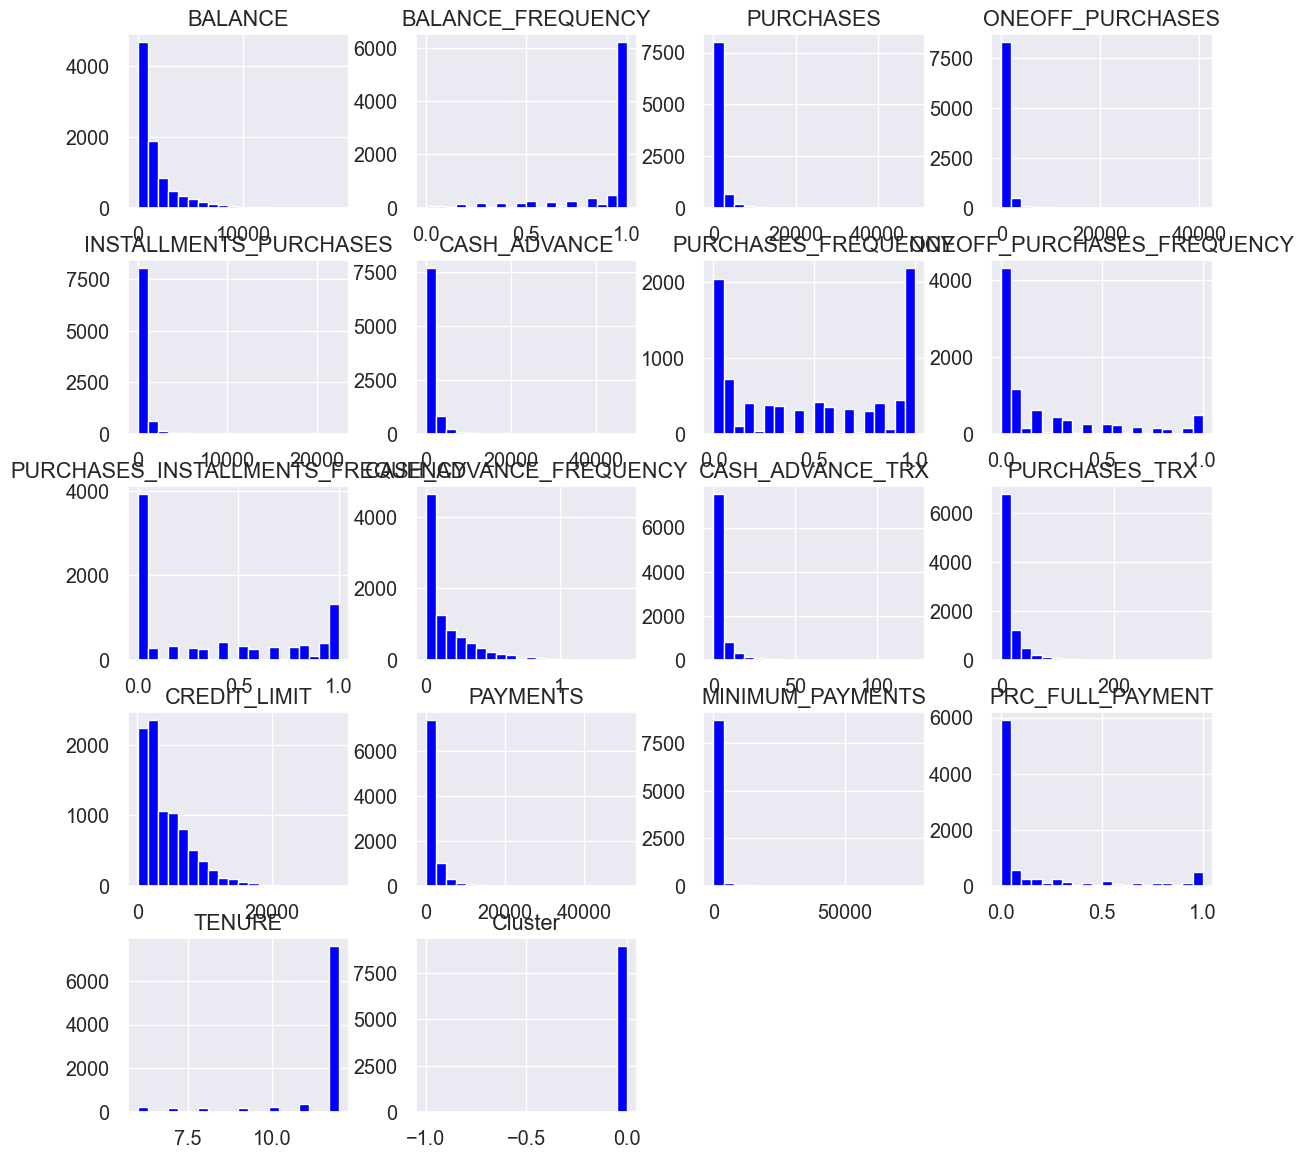

In [162]:
sns.set(style= 'dark', font_scale= 1.3, rc= {'figure.figsize':(14,14)})
ax = data.hist(bins= 20, color= 'blue')

In [8]:
import seaborn as sns  
import numpy as np
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

In [9]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data.drop(columns=['CUST_ID']))

In [10]:
stnd_data=pd.DataFrame(scaled_data, columns=data.drop("CUST_ID",axis=True).columns)

In [11]:
stnd_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.310967,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.089310,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.101663,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.000003,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.265791,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.349854,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.000003,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.335465,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.346906,0.329200,-4.122768


In [12]:
from sklearn.cluster import KMeans 

In [13]:
stnd_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [14]:
X_numerics =stnd_data[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]

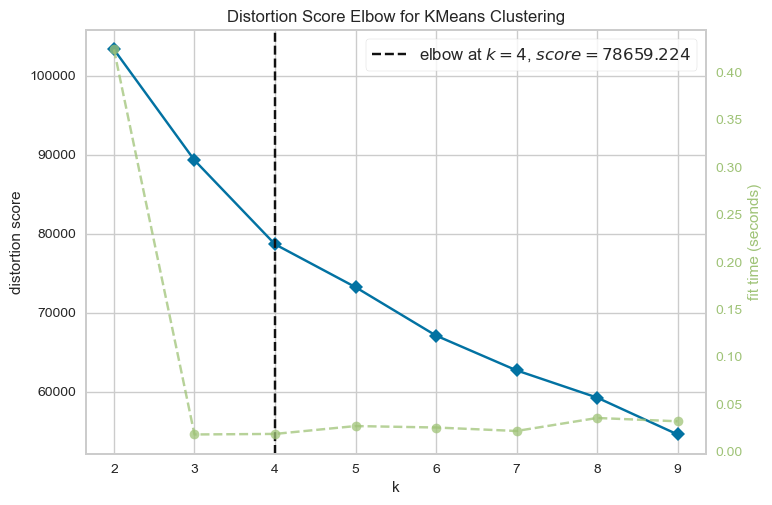

In [16]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

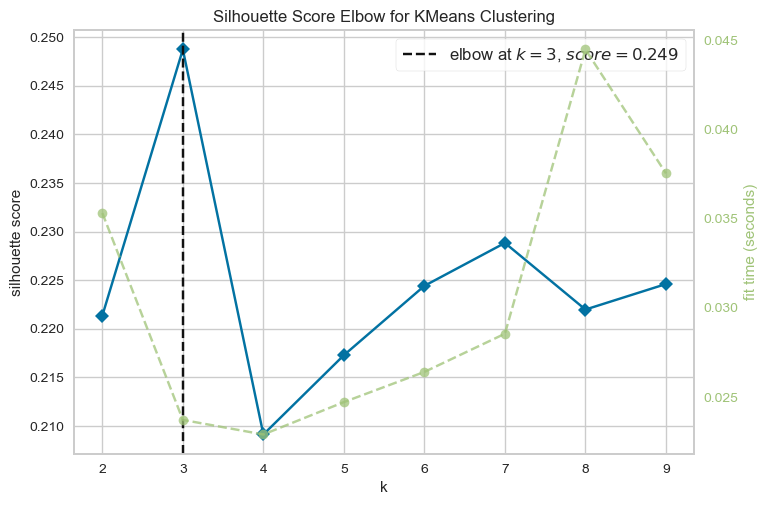

In [17]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [53]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Set random_state for reproducibility
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [54]:
cluster_labels = kmeans.labels_

In [55]:
from sklearn.metrics import silhouette_score

In [57]:
sil_score = silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score for KMeans clustering: {sil_score:.4f}')

Silhouette Score for KMeans clustering: 0.2068


In [61]:
data['Cluster'] = cluster_labels

print("\nFirst few rows of the DataFrame with cluster labels:")
data.head()


First few rows of the DataFrame with cluster labels:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.200000,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [62]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Set random_state for reproducibility
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [63]:
cluster_labels = kmeans.labels_

In [64]:
sil_score = silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score for KMeans clustering: {sil_score:.4f}')

Silhouette Score for KMeans clustering: 0.1663


In [65]:
data['Cluster'] = cluster_labels

print("\nFirst few rows of the DataFrame with cluster labels:")
data.head()


First few rows of the DataFrame with cluster labels:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.200000,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [66]:
from sklearn.decomposition import PCA

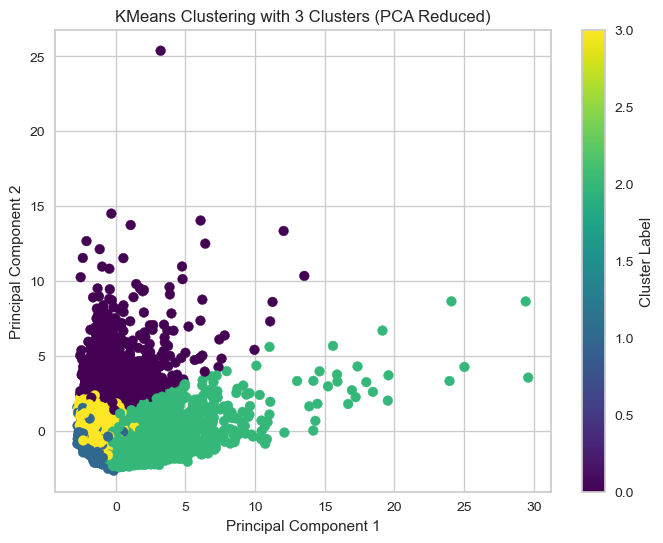

In [67]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('KMeans Clustering with 3 Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [68]:
from sklearn.cluster import DBSCAN

In [76]:
dbscan = DBSCAN(eps=3.5, min_samples=5)  # Adjust eps for 3-4 clusters, tune for your dataset
dbscan.fit(scaled_data)

DBSCAN(eps=3.5)

In [77]:
data['Cluster'] = dbscan.labels_

In [78]:
if len(set(dbscan.labels_)) > 1 and -1 not in set(dbscan.labels_):
    silhouette_avg = silhouette_score(scaled_data, dbscan.labels_)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score cannot be computed, less than 2 clusters or only noise.")

Silhouette Score cannot be computed, less than 2 clusters or only noise.


In [79]:
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Number of clusters found: {num_clusters}")

Number of clusters found: 1


In [81]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.200000,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
pca = PCA()
pca.fit(scaled_data)

In [83]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [97]:
pca = PCA()
pca.fit(stnd_data)

PCA()

In [101]:
np.round(pca.explained_variance_,3)

array([4.64 , 3.452, 1.495, 1.272, 1.065, 0.978, 0.831, 0.724, 0.651,
       0.524, 0.403, 0.302, 0.243, 0.207, 0.172, 0.045, 0.   ])

In [102]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings

array([[ 2.17744601e-01,  7.50502931e-01,  1.95720385e-01,
         3.19642414e-01, -4.90935121e-02, -3.94438979e-02,
         2.29983254e-01, -1.44318913e-01,  1.05125614e-01,
        -2.24053452e-02,  9.31747315e-02,  2.63644221e-01,
        -2.59223852e-01, -7.83427995e-02, -9.05612881e-02,
        -1.12014475e-03, -1.41879349e-07],
       [ 2.58596198e-01,  2.42538900e-01,  5.14237216e-01,
         1.68857906e-01,  4.99995165e-01, -3.50216634e-02,
        -9.54534103e-02,  2.20408796e-01,  5.01336654e-01,
         5.89330447e-02, -7.54159028e-02, -5.27144530e-02,
         9.29180574e-02,  1.87480596e-02, -1.67274588e-02,
        -2.38196595e-03, -2.91719921e-08],
       [ 8.86682943e-01,  7.62153432e-02, -3.15342325e-01,
         4.40663226e-02, -3.23496113e-02, -1.74379861e-01,
        -1.85213147e-01,  1.69228956e-02,  8.48259606e-02,
        -3.70480588e-02,  1.27587056e-01, -4.14317799e-02,
        -5.57973436e-02,  1.02650075e-01,  2.11751671e-02,
         4.66986987e-04,  2.5

In [104]:
loadings_df = pd.DataFrame(loadings, index=stnd_data.columns)
loadings_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
BALANCE,0.217745,0.750503,0.195720,0.319642,-0.049094,-0.039444,0.229983,-0.144319,0.105126,-0.022405,0.093175,0.263644,-0.259224,-0.078343,-0.090561,-0.001120,-1.418793e-07
BALANCE_FREQUENCY,0.258596,0.242539,0.514237,0.168858,0.499995,-0.035022,-0.095453,0.220409,0.501337,0.058933,-0.075416,-0.052714,0.092918,0.018748,-0.016727,-0.002382,-2.917199e-08
PURCHASES,0.886683,0.076215,-0.315342,0.044066,-0.032350,-0.174380,-0.185213,0.016923,0.084826,-0.037048,0.127587,-0.041432,-0.055797,0.102650,0.021175,0.000467,2.556419e-03
ONEOFF_PURCHASES,0.746167,0.116784,-0.479437,0.088103,0.160748,-0.182611,-0.110805,0.107014,0.014608,0.127112,0.284411,0.028876,0.004392,0.102552,0.023089,-0.000987,-1.986302e-03
INSTALLMENTS_PURCHASES,0.725503,-0.034453,0.135081,-0.057695,-0.371784,-0.076817,-0.234432,-0.156619,0.173736,-0.321076,-0.220779,-0.150953,-0.139874,0.054270,0.007657,0.003104,-1.081399e-03
CASH_ADVANCE,-0.050262,0.816060,0.033417,-0.287094,-0.099747,0.145141,0.045630,-0.018007,-0.041489,0.259897,-0.225169,0.099672,-0.010359,0.277781,0.086574,-0.001498,-7.569728e-08
PURCHASES_FREQUENCY,0.692498,-0.354458,0.458108,-0.213108,0.095425,0.036848,0.142201,-0.028878,-0.178935,0.181530,0.074655,-0.087252,-0.094675,-0.005345,0.009582,0.144498,5.416131e-07
ONEOFF_PURCHASES_FREQUENCY,0.634647,-0.033316,-0.140772,0.030979,0.548523,-0.024503,0.264943,0.087929,-0.322762,-0.079259,-0.238327,-0.088378,-0.123134,-0.021560,0.007422,-0.072772,-4.864201e-07
PURCHASES_INSTALLMENTS_FREQUENCY,0.591726,-0.331829,0.578806,-0.242468,-0.185918,0.051830,-0.033196,-0.132300,-0.060557,0.182656,0.182528,0.010258,0.021409,-0.017033,0.027725,-0.135013,-5.890352e-07
CASH_ADVANCE_FREQUENCY,-0.191991,0.806476,0.133323,-0.297999,0.141763,-0.065237,-0.128986,0.043200,-0.073377,-0.206954,0.137663,-0.021398,-0.019451,-0.140556,0.274918,0.008675,5.069016e-08


In [110]:
threshold = 0.7
important_features = loadings_df[loadings_df.abs().max(axis=1) > threshold]

In [111]:
columns_to_keep = important_features.index
columns_to_keep

Index(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'PURCHASES_TRX', 'TENURE'],
      dtype='object')

In [112]:
np.round(pca.explained_variance_,3)

array([4.64 , 3.452, 1.495, 1.272, 1.065, 0.978, 0.831, 0.724, 0.651,
       0.524, 0.403, 0.302, 0.243, 0.207, 0.172, 0.045, 0.   ])

In [113]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Cluster'],
      dtype='object')

In [114]:
columns_drop=['CUST_ID','BALANCE_FREQUENCY','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY','CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','Cluster']

In [115]:
pca_data=data.drop(columns=columns_drop)

In [116]:
pca_data

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,TENURE
0,40.900749,95.40,0.00,95.40,0.000000,0.000000,0,2,12
1,3202.467416,0.00,0.00,0.00,6442.945483,0.250000,4,0,12
2,2495.148862,773.17,773.17,0.00,0.000000,0.000000,0,12,12
3,1666.670542,1499.00,1499.00,0.00,205.788017,0.083333,1,1,12
4,817.714335,16.00,16.00,0.00,0.000000,0.000000,0,1,12
...,...,...,...,...,...,...,...,...,...
8945,28.493517,291.12,0.00,291.12,0.000000,0.000000,0,6,6
8946,19.183215,300.00,0.00,300.00,0.000000,0.000000,0,6,6
8947,23.398673,144.40,0.00,144.40,0.000000,0.000000,0,5,6
8948,13.457564,0.00,0.00,0.00,36.558778,0.166667,2,0,6


In [117]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(pca_data)

In [120]:
Pca_stnd_data=pd.DataFrame(scaled_data, columns=pca_data.columns)
Pca_stnd_data

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,TENURE
0,-0.731989,-0.424900,-0.356934,-0.349079,-0.466786,-0.675349,-0.476070,-0.511333,0.360680
1,0.786961,-0.469552,-0.356934,-0.454576,2.605605,0.573963,0.110074,-0.591796,0.360680
2,0.447135,-0.107668,0.108889,-0.454576,-0.466786,-0.675349,-0.476070,-0.109020,0.360680
3,0.049099,0.232058,0.546189,-0.454576,-0.368653,-0.258913,-0.329534,-0.551565,0.360680
4,-0.358775,-0.462063,-0.347294,-0.454576,-0.466786,-0.675349,-0.476070,-0.551565,0.360680
...,...,...,...,...,...,...,...,...,...
8945,-0.737950,-0.333293,-0.356934,-0.132643,-0.466786,-0.675349,-0.476070,-0.350408,-4.122768
8946,-0.742423,-0.329136,-0.356934,-0.122823,-0.466786,-0.675349,-0.476070,-0.350408,-4.122768
8947,-0.740398,-0.401965,-0.356934,-0.294893,-0.466786,-0.675349,-0.476070,-0.390639,-4.122768
8948,-0.745174,-0.469552,-0.356934,-0.454576,-0.449352,0.157527,-0.182998,-0.591796,-4.122768


In [123]:
X_numerics =stnd_data[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'PURCHASES_TRX', 'TENURE']]

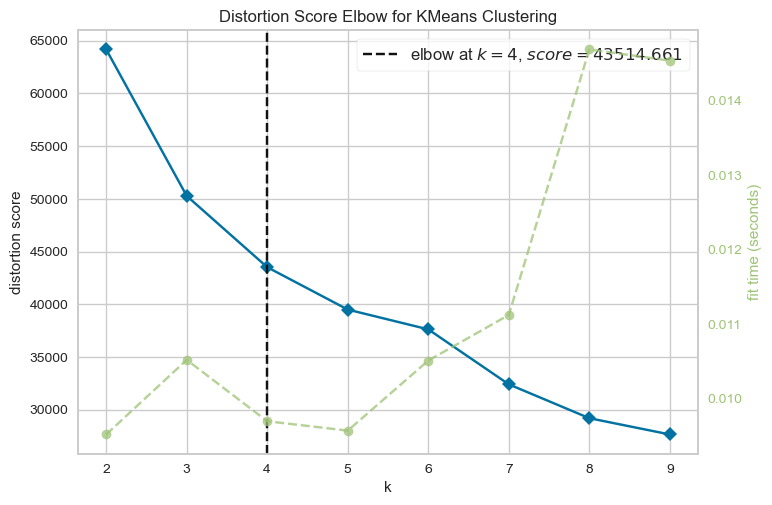

In [124]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

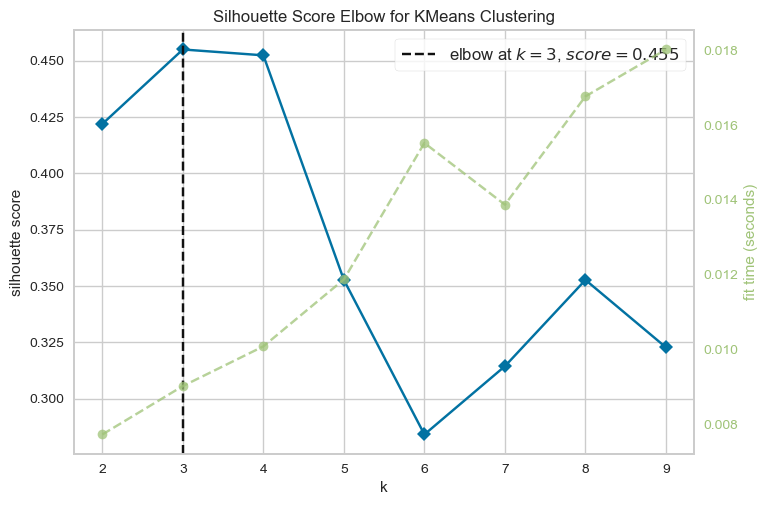

In [125]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [126]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(Pca_stnd_data)


KMeans(n_clusters=3, random_state=42)

In [127]:
cluster_labels = kmeans.labels_
sil_score = silhouette_score(Pca_stnd_data, cluster_labels)
print(f'Silhouette Score for KMeans clustering: {sil_score:.4f}')


Silhouette Score for KMeans clustering: 0.4544


In [128]:
data['Cluster'] = cluster_labels

print("\nFirst few rows of the DataFrame with cluster labels:")
data.head()


First few rows of the DataFrame with cluster labels:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.200000,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [129]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(Pca_stnd_data)

KMeans(n_clusters=4, random_state=42)

In [130]:
cluster_labels = kmeans.labels_
sil_score = silhouette_score(Pca_stnd_data, cluster_labels)
print(f'Silhouette Score for KMeans clustering: {sil_score:.4f}')

Silhouette Score for KMeans clustering: 0.4111


In [131]:
data['Cluster'] = cluster_labels

print("\nFirst few rows of the DataFrame with cluster labels:")
data.head()


First few rows of the DataFrame with cluster labels:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.200000,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


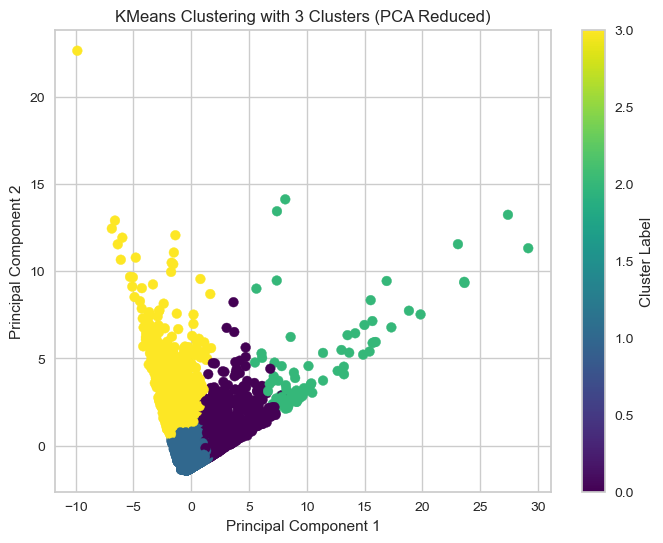

In [133]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(Pca_stnd_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('KMeans Clustering with 3 Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [135]:
dbscan = DBSCAN(eps=3.5, min_samples=5)  
dbscan.fit(Pca_stnd_data)

DBSCAN(eps=3.5)

In [136]:
data['Cluster'] = dbscan.labels_

In [137]:
if len(set(dbscan.labels_)) > 1 and -1 not in set(dbscan.labels_):
    silhouette_avg = silhouette_score(scaled_data, dbscan.labels_)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score cannot be computed, less than 2 clusters or only noise.")

Silhouette Score cannot be computed, less than 2 clusters or only noise.


In [138]:
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Number of clusters found: {num_clusters}")

Number of clusters found: 2


In [141]:
threshold = 0.8
important_features = loadings_df[loadings_df.abs().max(axis=1) > threshold]

In [142]:
columns_to_keep = important_features.index
columns_to_keep

Index(['PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX'], dtype='object')

In [143]:
columns_drop=['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Cluster']

In [144]:
pca_data_1=data.drop(columns=columns_drop)

In [145]:
pca_data_1

,PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX
0,95.40,0.000000,0.000000,2
1,0.00,6442.945483,0.250000,0
2,773.17,0.000000,0.000000,12
3,1499.00,205.788017,0.083333,1
4,16.00,0.000000,0.000000,1
...,...,...,...,...
8945,291.12,0.000000,0.000000,6
8946,300.00,0.000000,0.000000,6
8947,144.40,0.000000,0.000000,5
8948,0.00,36.558778,0.166667,0


In [146]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(pca_data_1)

In [147]:
Pca_stnd_data=pd.DataFrame(scaled_data, columns=pca_data_1.columns)
Pca_stnd_data

,PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX
0,-0.424900,-0.466786,-0.675349,-0.511333
1,-0.469552,2.605605,0.573963,-0.591796
2,-0.107668,-0.466786,-0.675349,-0.109020
3,0.232058,-0.368653,-0.258913,-0.551565
4,-0.462063,-0.466786,-0.675349,-0.551565
...,...,...,...,...
8945,-0.333293,-0.466786,-0.675349,-0.350408
8946,-0.329136,-0.466786,-0.675349,-0.350408
8947,-0.401965,-0.466786,-0.675349,-0.390639
8948,-0.469552,-0.449352,0.157527,-0.591796


In [148]:
X_numerics =stnd_data[['PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX']]

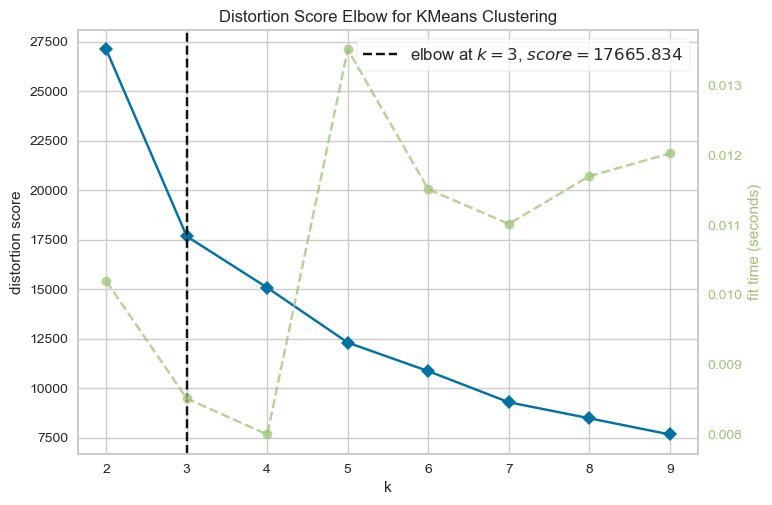

In [149]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

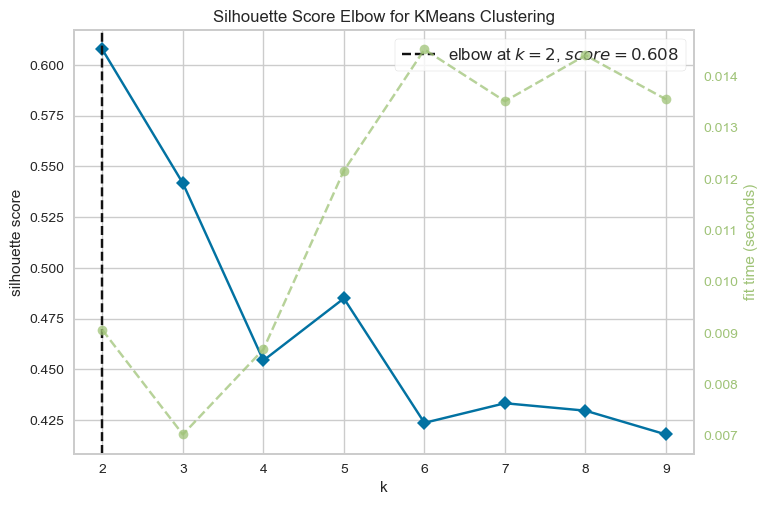

In [150]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [151]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(Pca_stnd_data)

KMeans(n_clusters=3, random_state=42)

In [152]:
cluster_labels = kmeans.labels_
sil_score = silhouette_score(Pca_stnd_data, cluster_labels)
print(f'Silhouette Score for KMeans clustering: {sil_score:.4f}')

Silhouette Score for KMeans clustering: 0.5416


In [153]:
data['Cluster'] = cluster_labels

print("\nFirst few rows of the DataFrame with cluster labels:")
data.head()


First few rows of the DataFrame with cluster labels:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.200000,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [154]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(Pca_stnd_data)

KMeans(n_clusters=4, random_state=42)

In [155]:
cluster_labels = kmeans.labels_
sil_score = silhouette_score(Pca_stnd_data, cluster_labels)
print(f'Silhouette Score for KMeans clustering: {sil_score:.4f}')

Silhouette Score for KMeans clustering: 0.4529


In [156]:
data['Cluster'] = cluster_labels

print("\nFirst few rows of the DataFrame with cluster labels:")
data.head()


First few rows of the DataFrame with cluster labels:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.200000,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


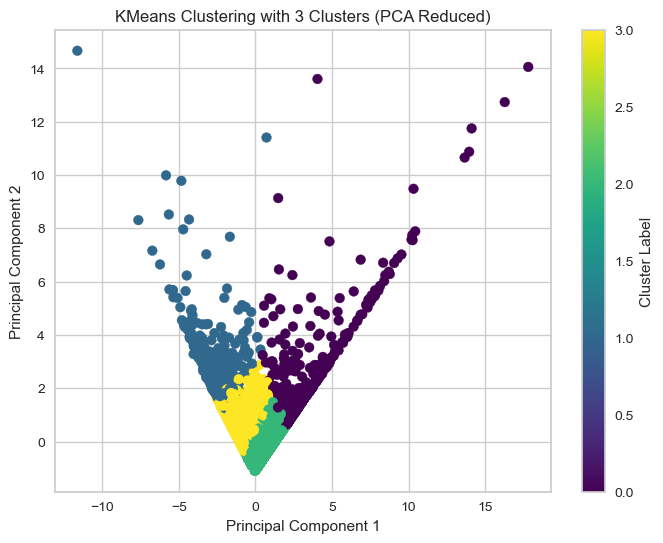

In [157]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(Pca_stnd_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('KMeans Clustering with 3 Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [158]:
dbscan = DBSCAN(eps=3.5, min_samples=5)  
dbscan.fit(Pca_stnd_data)

DBSCAN(eps=3.5)

In [159]:
data['Cluster'] = dbscan.labels_

In [160]:
if len(set(dbscan.labels_)) > 1 and -1 not in set(dbscan.labels_):
    silhouette_avg = silhouette_score(scaled_data, dbscan.labels_)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score cannot be computed, less than 2 clusters or only noise.")

Silhouette Score cannot be computed, less than 2 clusters or only noise.


In [161]:
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Number of clusters found: {num_clusters}")

Number of clusters found: 1


The best to model to fit this dataset is Kmeans with 3 cluster 
